In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


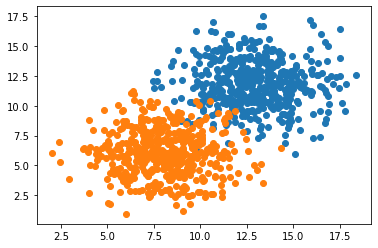

In [48]:

n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [49]:
model = Sequential()

model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(learning_rate = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs= 100, shuffle='true')


Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 0.8032 - accuracy: 0.5800
Epoch 2/100
20/20 [==============================] - 0s 842us/step - loss: 0.4944 - accuracy: 0.7710
Epoch 3/100
20/20 [==============================] - 0s 895us/step - loss: 0.4177 - accuracy: 0.8650
Epoch 4/100
20/20 [==============================] - 0s 1000us/step - loss: 0.3747 - accuracy: 0.8740
Epoch 5/100
20/20 [==============================] - 0s 895us/step - loss: 0.3108 - accuracy: 0.9220
Epoch 6/100
20/20 [==============================] - 0s 895us/step - loss: 0.2741 - accuracy: 0.9470
Epoch 7/100
20/20 [==============================] - 0s 895us/step - loss: 0.2445 - accuracy: 0.9480
Epoch 8/100
20/20 [==============================] - 0s 948us/step - loss: 0.2224 - accuracy: 0.9600
Epoch 9/100
20/20 [==============================] - 0s 895us/step - loss: 0.2041 - accuracy: 0.9610
Epoch 10/100
20/20 [==============================] - 0s 947us/step - loss: 0.1872 - accurac

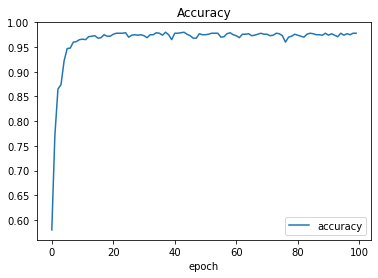

In [50]:
plt.plot(h.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

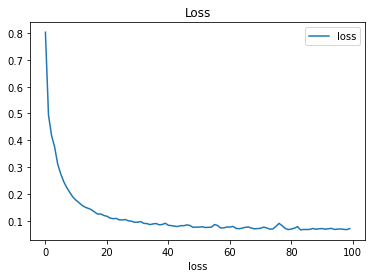

In [51]:
plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('loss')
plt.legend(['loss'])

In [52]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    # print(y_span)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_,yy_ = xx.ravel(), yy.ravel()
    # print(xx_)
    # print(yy_)
    grid = np.c_[xx_,yy_]
    print(grid)
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(X[:n_pts,0], X[:n_pts,1])
    plt.scatter(X[n_pts:,0], X[n_pts:,1])


[[ 1.01077428 -0.08247762]
 [ 1.38591048 -0.08247762]
 [ 1.76104668 -0.08247762]
 ...
 [18.6421757  18.51871023]
 [19.0173119  18.51871023]
 [19.39244811 18.51871023]]


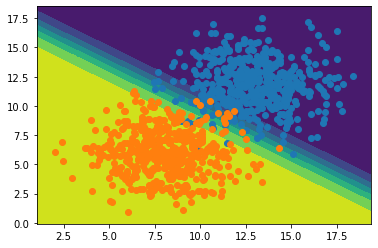

In [53]:
plot_decision_boundary(X, y, model)

[[ 1.01077428 -0.08247762]
 [ 1.38591048 -0.08247762]
 [ 1.76104668 -0.08247762]
 ...
 [18.6421757  18.51871023]
 [19.0173119  18.51871023]
 [19.39244811 18.51871023]]
Prediction is: [[0.9998203]]


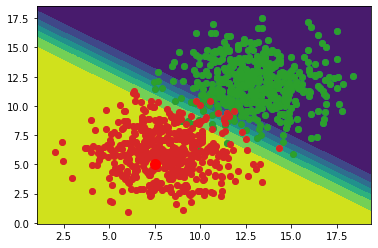

In [56]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x],[y], marker='o',markersize = 10, color='cyan')
print("Prediction is:", prediction)